# 2 Boyutlu Vektörel Değişken İçeren Elastisite Probleminin Çözümü

Geçtiğimiz bölümde eleman sertlik matrisini ve kuvvet vektörünü referans elemanlar için integral formunda türetmiştik. Şimdi bu türettiğimiz denklemleri nümerik olarak hesaplayıp, global sertlik matrisini ve kuvvet vektörünü elde edelim. Hesaplamalara başlamadan önce problemin çözümünde kullanacağımız ağı (mesh) tanımlayalım. Şekil 3'te kullanacağımız ağ yapısı gösterilmiştir. Gri noktalar düğüm noktalarını göstermektedir. Eleman numaraları elemanların içinde yuvarlak içerisinde gösterilirken, düğüm noktalarının yanında numaraları ve $x-y$ koordinat sisteminde konumları metre cinsinden gösterilmektedir. 

<img src="Resimler/Ders8/Sekil3.png" align="center" width= "700"/>

## Yerel Sertlik Matrisinin Oluşturulması

Öncelikle 8b'de referans eleman için türettiğimiz yerel sertlik matrisini ifade eden integrali hatırlayalım:

$$\int_{-1}^{1}\int_{-1}^{1} \mathbf{N}^{T}\mathbf{J}^{T}\mathbf{H}^{T}\mathbf{C}\mathbf{H}\mathbf{J}\mathbf{N}d\eta d\xi det(\mathbf{J}).\tag{1} $$


Şimdi de bir önceki bölümde türettiğiniz integral içerisindeki matrisleri hatırlayalım:

$$ \mathbf{C}= \frac{E}{(1-\nu^{2})} \begin{bmatrix} 1 & \nu & 0 \\ \nu & 1 & 0 \\ 0 & 0 & \frac{1-\nu}{2} \end{bmatrix}, $$
$$ \mathbf{H}=\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 1 & 1 & 0 \end{bmatrix},$$
$$\mathbf{J}=\begin{bmatrix} \mathbf{J^{-1}} & 0 \\ 0 & \mathbf{J^{-1}} \end{bmatrix},$$
$$\mathbf{N}=\begin{bmatrix} \frac{\partial N_1}{\partial \xi}  & 0 & \frac{\partial N_2}{\partial \xi}  & 0 & \frac{\partial N_3}{\partial \xi} & 0 & \frac{\partial N_4}{\partial \xi} & 0 & \\ \\ \frac{\partial N_1}{\partial \eta} & 0  & \frac{\partial N_2}{\partial \eta} & 0  & \frac{\partial N_3}{\partial \eta} & 0 & \frac{\partial N_4}{\partial \eta} & 0 \\ \\ 0  & \frac{\partial N_1}{\partial \xi}  & 0 & \frac{\partial N_2}{\partial \xi} & 0  & \frac{\partial N_3}{\partial \xi}  & 0 & \frac{\partial N_4}{\partial \xi}\\ \\ 0  & \frac{\partial N_1}{\partial \eta}  & 0 & \frac{\partial N_2}{\partial \eta} & 0  & \frac{\partial N_3}{\partial \eta}  & 0 & \frac{\partial N_4}{\partial \eta} \end{bmatrix}.$$

Görülebileceği üzere $\mathbf{C}$ ve $\mathbf{H}$ sabit değerli matrislerdir. İntegrali hesaplayabilmek için $\mathbf{J}$ ve $\mathbf{N}$ matirslerini tanımlamamız gerekir. Öncelikle bunun için 7. bölümde olduğu gibi *sympy* kütüphanesini kullanalım. 

Bölüm 7'de olduğu gibi $\mathbf{N}$ matrisini yazabilmek için şekil fonksiyonlarını sembolik olarak yazalım:

In [19]:
import sympy as sp
import numpy as np

xi = sp.Symbol("xi")
eta = sp.Symbol("eta")
x_ = sp.symbols("x1,x2,x3,x4")
y_ = sp.symbols("y1,y2,y3,y4")
şekil = sp.Matrix([(1+xi)*(1+eta)/4,
                   (1-xi)*(1+eta)/4,
                   (1-xi)*(1-eta)/4,
                   (1+xi)*(1-eta)/4])
şekil

Matrix([
[(eta + 1)*(xi + 1)/4],
[(1 - xi)*(eta + 1)/4],
[(1 - eta)*(1 - xi)/4],
[(1 - eta)*(xi + 1)/4]])

Problem 2 boyutlu vektörel değişken içerdiğinden, 2 boyutlu dikdörtgen eleman için şekil fonksiyonlarının $\xi$ ve $\eta$'e göre türevlerini alıp $\mathbf{N}$'yi tanımlayalım:

In [20]:
gradyen_xi = sp.diff(şekil, xi)
gradyen_eta = sp.diff(şekil, eta)

N = sp.Matrix([[gradyen_xi[0],0,gradyen_xi[1],0,gradyen_xi[2],0, gradyen_xi[3],0],[gradyen_eta[0],0,gradyen_eta[1],0,gradyen_eta[2],0, gradyen_eta[3],0],[0,gradyen_xi[0],0,gradyen_xi[1],0, gradyen_xi[2],0,gradyen_xi[3]],[0,gradyen_eta[0],0,gradyen_eta[1],0, gradyen_eta[2],0,gradyen_eta[3]]])

N

Matrix([
[eta/4 + 1/4,           0, -eta/4 - 1/4,            0, eta/4 - 1/4,           0, 1/4 - eta/4,           0],
[ xi/4 + 1/4,           0,   1/4 - xi/4,            0,  xi/4 - 1/4,           0, -xi/4 - 1/4,           0],
[          0, eta/4 + 1/4,            0, -eta/4 - 1/4,           0, eta/4 - 1/4,           0, 1/4 - eta/4],
[          0,  xi/4 + 1/4,            0,   1/4 - xi/4,           0,  xi/4 - 1/4,           0, -xi/4 - 1/4]])

İlk olarak örnek olması için 1. elemana özel jakopyen matrisini oluşturup $\mathbf{J}$ matrisini hesaplayalım:

In [21]:
c_şekil = sp.Matrix([0, 0])
for i in range(4):
    c_şekil[0] += x_[i] * şekil[i]
    c_şekil[1] += y_[i] * şekil[i]
j = c_şekil.jacobian([xi, eta]).T

x_koord = [0,     0.16,    0.16,  0.0] 
y_koord = [-0.32,-0.20,   -0.10, -0.16]
    
for nokta in range(4):
    j = j.subs(x_[nokta],x_koord[nokta]) 
    j = j.subs(y_[nokta],y_koord[nokta])

J= sp.Matrix.zeros(4,4)
J[:2,:2] = j.inv()
J[2:,2:] = j.inv()

det = j.det()
det

0.0012*xi + 0.0052

Son olarak $\mathbf{C}$ ve $\mathbf{H}$ matrislerini tanımlayalım.

In [22]:
np.set_printoptions(linewidth=300, precision=3) # Tam matris gösterimleri için

E=1E7
v=0.3
H=sp.Matrix([[1,0,0,0],[0,0,0,1],[0,1,1,0]])
C=sp.Matrix([[1,v,0],[v,1,0],[0,0,(1-v)/2]])*E/(1-v**2)
C

Matrix([
[10989010.989011, 3296703.2967033,                0],
[3296703.2967033, 10989010.989011,                0],
[              0,               0, 3846153.84615385]])

Farkedileceği üzere $$\int_{-1}^{1}\int_{-1}^{1} \mathbf{N}^{T}\mathbf{J}^{T}\mathbf{H}^{T}\mathbf{C}\mathbf{H}\mathbf{J}\mathbf{N}d\eta d\xi det(\mathbf{J}).\tag{1} $$

denklemindeki 

$$\mathbf{H}^{T}\mathbf{C}\mathbf{H}$$ 

çarpımı her bir eleman için aynıdır, farklı olacak matrisler $\mathbf{J}$ ve $\mathbf{N}$ içeren matrislerdir. Bu yüzden bu çarpımı bir kere yapıp diğer elemanların sertlik matrisleri için kullanabiliriz. Bu matrisi $\mathbf{B}$ olarak tanımlayıp işlemi yapalım: 

In [23]:
B = H.T*C*H
B

Matrix([
[10989010.989011,                0,                0, 3296703.2967033],
[              0, 3846153.84615385, 3846153.84615385,               0],
[              0, 3846153.84615385, 3846153.84615385,               0],
[3296703.2967033,                0,                0, 10989010.989011]])

Artık yerel matrisi bulabilmek için gereken tüm değişkenler mevcuttur. Ders 7'dekinin aksine eleman sertlik matrisi, dikdörtgen referans eleman için 8x8'lik bir matris olacaktır. 

Şimdi son adım olarak integrasyon işlemini yapıp 1. eleman için eleman sertlik matrisini elde edelim:

In [24]:
from scipy import integrate
from sympy.utilities import lambdify

K_e = np.zeros((8,8))
K_ele_sys=N.T*J.T*B*J*N*det

for i in range(8):
    for j in range(8):
        # scipy'da bulunan integrasyon fonksiyonunu kullanmak için
        # hücre değerlerini geçici olarak 'lambda' formatına çevirmemiz gerekiyor.
        geçici_fonksiyon = lambdify( (xi,eta), K_ele_sys[i,j], 'math' )
        K_e[i,j] += integrate.nquad(geçici_fonksiyon, [[-1, 1],[-1, 1]])[0]
K_e

array([[ 2302296.384,   297511.034, -1430926.962,  -970523.149,    57300.589,  -952553.774,  -928670.011,  1625565.889],
       [  297511.034,  4377491.538,  -695797.875,  1498760.792,  -952553.774, -1979530.023,  1350840.614, -3896722.307],
       [-1430926.962,  -695797.875,  9899373.25 , -3666943.181, -2344428.195,  1743866.258, -6124018.093,  2618874.798],
       [ -970523.149,  1498760.792, -3666943.181,  7979729.985,  2018591.532, -5335499.216,  2618874.798, -4142991.561],
       [   57300.589,  -952553.774, -2344428.195,  2018591.532,  3718054.568,   -95514.609, -1430926.962,  -970523.149],
       [ -952553.774, -1979530.023,  1743866.258, -5335499.216,   -95514.609,  5816268.447,  -695797.875,  1498760.792],
       [ -928670.011,  1350840.614, -6124018.093,  2618874.798, -1430926.962,  -695797.875,  8483615.066, -3273917.537],
       [ 1625565.889, -3896722.307,  2618874.798, -4142991.561,  -970523.149,  1498760.792, -3273917.537,  6540953.076]])

## Global Sertlik Matrisinin Oluşturulması

1. elemana ait yerel sertlik matrisini tamamlamakla beraber artık bu işlemi global ölçeğe taşıyabiliriz. Öncelikle global sistemdeki noktaları ve bu noktaların global indislerini taşıyan geometri (mesh) değişkenini tanımlayalım:

In [25]:
noktalar = np.array([[0, -0.32],
                     [0, -0.16],
                     [0,0],
                     [0.16, -0.2],
                     [0.16,-0.1],
                     [0.13, 0],
                     [0.32,-0.08],
                     [0.29,-0.04],
                     [0.26,0]])

mesh = {1:[0,3,4,1],
        2:[4,5,2,1],
        3:[4,7,8,5],
        4:[3,6,7,4]}

Öncelikle herhangi bir eleman için $\mathbf{J}$ fonksiyonu tanımlayalım:

In [26]:
def lokal_jakobyen(mesh, noktalar, eleman_no):

    eleman_noktalar = mesh[eleman_no] # Elemana ait noktalarin global indislerini içeren dizi
    c_şekil = sp.Matrix([0, 0])
    
    for i in range(4):
        c_şekil[0] += x_[i] * şekil[i]
        c_şekil[1] += y_[i] * şekil[i]
        
    j = c_şekil.jacobian([xi, eta]).T
    
    for nokta, global_nokta in enumerate(eleman_noktalar):
        j = j.subs(x_[nokta],noktalar[global_nokta][0]) 
        j = j.subs(y_[nokta],noktalar[global_nokta][1])

    J = sp.Matrix.zeros(4,4)
    J[:2,:2] = j.inv()
    J[2:,2:] = j.inv()
    
    return J, j

Ardından lokal jakobyeni hesaplayan yukarıdaki fonksiyonu kullanarak yerel sertlik matrisini hesaplayan fonksiyonu yazalım:

In [ ]:
def K_e_eleman(mesh, noktalar,eleman_no,B,N):

    J_e,j_e = lokal_jakobyen(mesh, noktalar,eleman_no)

    K_ele_sym=N.T*J_e.T*B*J_e*N*j_e.det()

    koordinat_sayısı = 8
    K_e = np.zeros((koordinat_sayısı,koordinat_sayısı))

    xi = sp.Symbol("xi")
    eta = sp.Symbol("eta")
    
    for i in range(koordinat_sayısı):
        for j in range(koordinat_sayısı):
            geçici_fonksiyon = lambdify( (xi,eta), K_ele_sym[i,j], 'math' )
            K_e[i,j] += integrate.nquad(geçici_fonksiyon, [[-1, 1],[-1, 1]])[0]
            
    return K_e

Şimdi deneme için 1. elemanın matrisini hesaplayalım ve yukarıda bulduğumuz matris ile karşılaştırarak test yapalım:

In [27]:
K_1 = K_e_eleman(mesh, noktalar, 1, B, N) 
K_1

array([[ 2302296.384,   297511.034, -1430926.962,  -970523.149,    57300.589,  -952553.774,  -928670.011,  1625565.889],
       [  297511.034,  4377491.538,  -695797.875,  1498760.792,  -952553.774, -1979530.023,  1350840.614, -3896722.307],
       [-1430926.962,  -695797.875,  9899373.25 , -3666943.181, -2344428.195,  1743866.258, -6124018.093,  2618874.798],
       [ -970523.149,  1498760.792, -3666943.181,  7979729.985,  2018591.532, -5335499.216,  2618874.798, -4142991.561],
       [   57300.589,  -952553.774, -2344428.195,  2018591.532,  3718054.568,   -95514.609, -1430926.962,  -970523.149],
       [ -952553.774, -1979530.023,  1743866.258, -5335499.216,   -95514.609,  5816268.447,  -695797.875,  1498760.792],
       [ -928670.011,  1350840.614, -6124018.093,  2618874.798, -1430926.962,  -695797.875,  8483615.066, -3273917.537],
       [ 1625565.889, -3896722.307,  2618874.798, -4142991.561,  -970523.149,  1498760.792, -3273917.537,  6540953.076]])

Görüldüğü üzere bulunan her iki matris birebir aynıdır. Artık bulunan yerel matrisleri global matrisin içine ekleyelebiliriz. Bu işlemi yaparken bölüm 7'den farklı olarak, global matrisin boyutu $x$ ve $y$ değişkenlerinin katkılarını içerecek olduğundan koordinat sayısının iki katı olan kare matris olacaktır. Şimdi bu matrisi oluşturup 2şerli bloklar halinde yerel sertlik matrisini global sertlik matrisine taşıyalım. Bu işlemi yaparken yerel matrislerin global matristeki yerlerini bulurken yukarıda tanımladığımız $\textbf{mesh}$ değişkenini kullanacağız:   

In [30]:
K_global = np.zeros((noktalar.size, noktalar.size))
for el in range(1,5):
    K_e = K_e_eleman(mesh, noktalar, el, B, N)
    eleman_noktalar = mesh[el]
    for lokal_x, global_x in enumerate(eleman_noktalar):
        for lokal_y, global_y in enumerate(eleman_noktalar):
            K_global[2*global_x:2*global_x+2, 2*global_y:2*global_y+2] += K_e[2*lokal_x:2*lokal_x+2, 2*lokal_y:2*lokal_y+2]
            

K_global

array([[  2302296.384,    297511.034,   -928670.011,   1625565.889,         0.   ,         0.   ,  -1430926.962,   -970523.149,     57300.589,   -952553.774,         0.   ,         0.   ,         0.   ,         0.   ,         0.   ,         0.   ,         0.   ,         0.   ],
       [   297511.034,   4377491.538,   1350840.614,  -3896722.307,         0.   ,         0.   ,   -695797.875,   1498760.792,   -952553.774,  -1979530.023,         0.   ,         0.   ,         0.   ,         0.   ,         0.   ,         0.   ,         0.   ,         0.   ],
       [  -928670.011,   1350840.614,  11737735.006,  -1823733.309,    480960.711,    761615.881,  -6124018.093,   2618874.798,  -3560595.79 ,  -1367740.991,  -1605411.823,  -1539856.993,         0.   ,         0.   ,         0.   ,         0.   ,         0.   ,         0.   ],
       [  1625565.889,  -3896722.307,  -1823733.309,  11292947.66 ,    486890.607,  -2998546.769,   2618874.798,  -4142991.561,  -1367740.991,   2686778.249,  -153

## Global Kuvvet Matrisinin Oluşturulması


In [ ]:
# simdi f'i olusturalim
h = 0.005 # kalinlik

# f_global = np.array([0,0,0,0,0,-325,0,0,0,0,0,-1950,0,0,-2000,0,0,-1625])
f_global = np.array([0,0,0,0,0,0,0,0,0,0,0,-1950*2,0,0,-10/h,0,0,-3900*2])

In [ ]:
# simdi B.C. leri uygulayalim - galiba gerek yok - olmadigini anlat
alpha = 1e-16
beta  = 1
gamma = 0.0 # yatay hiz degerleri

sabit_koordinatlar = [0,2,4,5]

def dirichlet_uygula(noktalar, K_global, f_global, alpha, beta, gamma):

    for nokta in noktalar:
        K_global[nokta,nokta]+= 1*beta/alpha  
        f_global[nokta] += 1*gamma/alpha
    
    return K_global, f_global

K_global, f_global = dirichlet_uygula(sabit_koordinatlar, K_global, f_global, alpha, beta, gamma)

In [ ]:
# sistem cozumu

from scipy.linalg import solve

u = solve(K_global,f_global)
u

array([-4.929e-13, -2.450e-03, -6.486e-13, -1.931e-03,  9.415e-13, -1.170e-12, -9.322e-04, -3.789e-03, -3.415e-04, -3.994e-03,  1.301e-03, -3.831e-03, -1.674e-04, -7.806e-03,  7.513e-04, -7.381e-03,  1.860e-03, -7.160e-03])

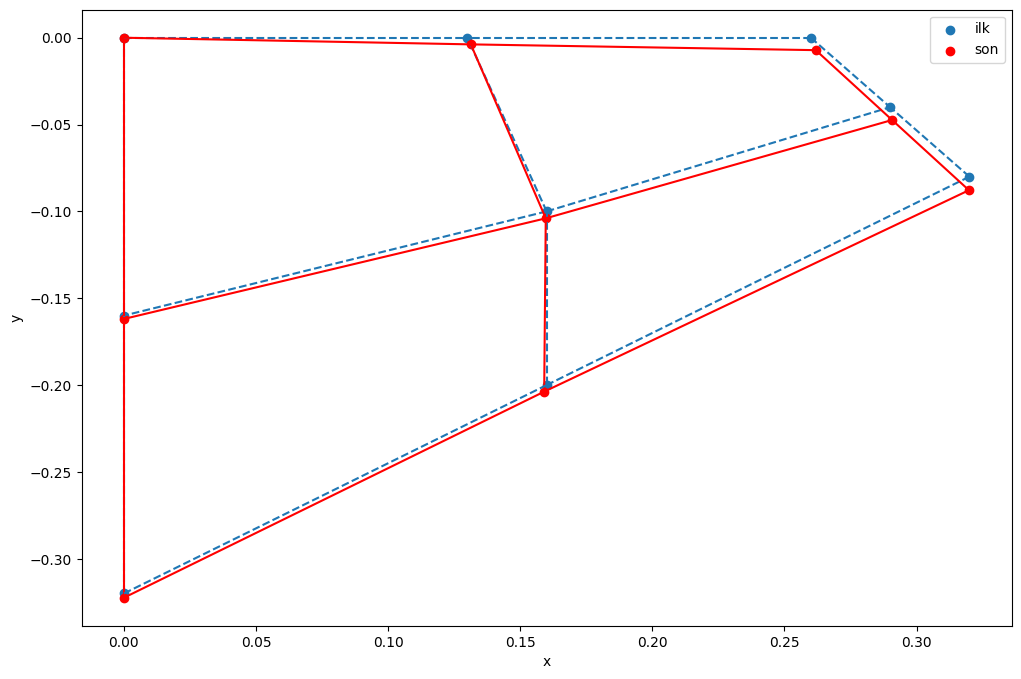

In [ ]:
# gorsellestirme
degisim = u.reshape(-1,2)
noktalar_son = noktalar+degisim

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(noktalar[:,0],noktalar[:,1], color='#1f77b4', label='ilk')
ax.scatter(noktalar_son[:,0],noktalar_son[:,1],color='red', label='son')
ax.legend()

# Eleman cizgileri
for i in [1,3,5,7]:
    ax.plot([noktalar[4][0],noktalar[i][0]],[noktalar[4][1],noktalar[i][1]],color='#1f77b4', linestyle='dashed')
    ax.plot([noktalar_son[4][0],noktalar_son[i][0]],[noktalar_son[4][1],noktalar_son[i][1]],color='red')
for i in [1,5]:
    ax.plot([noktalar[2][0],noktalar[i][0]],[noktalar[2][1],noktalar[i][1]],color='#1f77b4', linestyle='dashed')
    ax.plot([noktalar_son[2][0],noktalar_son[i][0]],[noktalar_son[2][1],noktalar_son[i][1]],color='red')
for i in [5,7]:
    ax.plot([noktalar[8][0],noktalar[i][0]],[noktalar[8][1],noktalar[i][1]],color='#1f77b4', linestyle='dashed')
    ax.plot([noktalar_son[8][0],noktalar_son[i][0]],[noktalar_son[8][1],noktalar_son[i][1]],color='red')
for i in [1,3]:
    ax.plot([noktalar[0][0],noktalar[i][0]],[noktalar[0][1],noktalar[i][1]],color='#1f77b4', linestyle='dashed')
    ax.plot([noktalar_son[0][0],noktalar_son[i][0]],[noktalar_son[0][1],noktalar_son[i][1]],color='red')
for i in [3,7]:
    ax.plot([noktalar[6][0],noktalar[i][0]],[noktalar[6][1],noktalar[i][1]],color='#1f77b4', linestyle='dashed')
    ax.plot([noktalar_son[6][0],noktalar_son[i][0]],[noktalar_son[6][1],noktalar_son[i][1]],color='red')
